In [1]:
# open the gromacs data file and read the entire contents as lines
gro_name = "five_spc_waters.gro"
gro_file = open(gro_name)
contents = gro_file.read().split("\n")

# close input file
gro_file.close()

# read all the data into local variables
title = contents[0]
num_atoms = int(contents[1])

mol_data = []
for i in range(0, num_atoms):
    raw_atom_info = contents[2 + i]
    
    # get all the data about the atom
    num = int(raw_atom_info[0:5])
    name = raw_atom_info[5:10].strip()
    atom_name = raw_atom_info[10:15].strip()
    index = int(raw_atom_info[15:20])
    position = [float(v) for v in raw_atom_info[20:].split()]
    
    atom_type = atom_name[0]
    
    mol_data.append((num, name, atom_type, index, position))

box_dims = [float(v) for v in contents[-1].split()]



In [2]:
from operator import mul
from functools import reduce

# question 1: reading information from the gromacs file

box_size_str = " nm x ".join(str(v) for v in box_dims)
box_volume = reduce(mul, box_dims, 1)
unique_atom_str = ", ".join(set(list(zip(*mol_data))[2]))

print("data summary:")
print("a) number of atoms: {}".format(num_atoms))
print("b) simulation box size: {} nm".format(box_size_str))
print("c) volume of the box: {:.5f} nm^3".format(box_volume))
print("d) different atom types: {}".format(unique_atom_str))


data summary:
a) number of atoms: 15
b) simulation box size: 1.86206 nm x 1.86206 nm x 1.86206 nm
c) volume of the box: 6.45626 nm3
d) different atom types: O, H


In [196]:
# question 2: printing some statistics about the positions

positions = [data[4] for data in mol_data]
position_list = list(zip(*positions))

print("position statistics of all atoms:")
print("{:>4s} {:>10s} {:>10s} {:>10s}".format("axis", "min (nm)", "max (nm)", "avg (nm)"))

for pos, c in zip(position_list, ["x", "y", "z"]):
    print("{:>4s} {:10.3f} {:10.3f} {:10.3f}".format(
        c, min(pos), max(pos), sum(pos) / len(pos)))

position statistics of all atoms:
axis   min (nm)   max (nm)   avg (nm)
   x     -0.366      0.580      0.117
   y     -0.594      0.628      0.063
   z     -0.878      0.784     -0.019


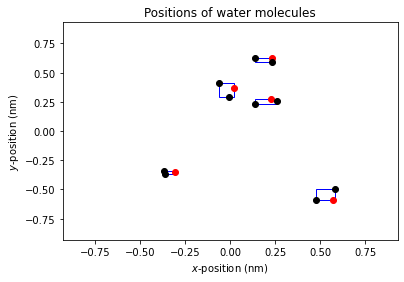

,name,atom_type,index,position,x,y,x0,x1,y0,y1
number,,,,,,,,,,
1,SOL,O,1,"[0.23, 0.628, 0.113]",0.230,0.628,0.137,0.231,0.589,0.628
1,SOL,H,2,"[0.137, 0.626, 0.15]",0.137,0.626,0.137,0.231,0.589,0.628
1,SOL,H,3,"[0.231, 0.589, 0.021]",0.231,0.589,0.137,0.231,0.589,0.628
2,SOL,O,4,"[0.225, 0.275, -0.866]",0.225,0.275,0.137,0.260,0.230,0.275
2,SOL,H,5,"[0.26, 0.258, -0.774]",0.260,0.258,0.137,0.260,0.230,0.275
2,SOL,H,6,"[0.137, 0.23, -0.878]",0.137,0.230,0.137,0.260,0.230,0.275
3,SOL,O,7,"[0.019, 0.368, 0.647]",0.019,0.368,-0.063,0.019,0.295,0.411
3,SOL,H,8,"[-0.063, 0.411, 0.686]",-0.063,0.411,-0.063,0.019,0.295,0.411
3,SOL,H,9,"[-0.009, 0.295, 0.584]",-0.009,0.295,-0.063,0.019,0.295,0.411


In [197]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd


# question 3: plotting positions of the atoms


def make_rect(x0, x1, y0, y1):
    return patches.Rectangle((x0, y0), x1-x0, y1-y0, linewidth=1, edgecolor='b', facecolor='none')

# put everything in a pandas dataframe
df = pd.DataFrame(mol_data, columns=["number", "name", "atom_type", "index", "position"])

positions_O = df[df["atom_type"] == "O"]["position"]
positions_H = df[df["atom_type"] == "H"]["position"]
pos_O = list(zip(*positions_O))
pos_H = list(zip(*positions_H))

df[["x", "y"]] = df.apply(lambda row: [row["position"][0], row["position"][1]], axis=1, result_type="expand")
boxes = pd.concat([df.groupby("number")["x"].min().rename("x0"), 
                   df.groupby("number")["x"].max().rename("x1"), 
                   df.groupby("number")["y"].min().rename("y0"), 
                   df.groupby("number")["y"].max().rename("y1")], axis=1).reset_index()

# get the rectangles to draw the box around each molecule
rects = boxes.apply(lambda row: make_rect(row["x0"], row["x1"], row["y0"], row["y1"]), axis=1)
fig, ax = plt.subplots()

# plot the boxes surrounding each water molecule
for rect in rects:
    ax.add_patch(rect)

# plot the atoms
ax.plot(pos_O[0], pos_O[1], "ro")
ax.plot(pos_H[0], pos_H[1], "o", color="black")

ax.set_xlim([box_dims[0] / 2 - box_dims[0], box_dims[0] / 2])
ax.set_ylim([box_dims[1] / 2 - box_dims[1], box_dims[1] / 2])
ax.set_xlabel("$x$-position (nm)")
ax.set_ylabel("$y$-position (nm)")
ax.set_title("Positions of water molecules")

plt.show()

# showing all the data collected to generate the plot
df.set_index("number").join(boxes.set_index("number"))


In [12]:
# question 4: printing a .xyz file

xyz_name = "five_spc_waters.xyz"
xyz_output = open(xyz_name, "w")

xyz_output.write("{}\n".format(num_atoms))
xyz_output.write("{}\n".format(title.split(",")[0]))

for mol in mol_data:
    symbol = mol[2][0]
    xyz_output.write("{} {}\n".format(symbol, " ".join("{:.3f}".format(v) for v in mol[4])))
    
xyz_output.close()

# print the file contents to show
xyz_file = open(xyz_name, "r")
print(xyz_file.read())

15
5H2O
O 0.230 0.628 0.113
H 0.137 0.626 0.150
H 0.231 0.589 0.021
O 0.225 0.275 -0.866
H 0.260 0.258 -0.774
H 0.137 0.230 -0.878
O 0.019 0.368 0.647
H -0.063 0.411 0.686
H -0.009 0.295 0.584
O 0.569 -0.587 -0.697
H 0.476 -0.594 -0.734
H 0.580 -0.498 -0.653
O -0.307 -0.351 0.703
H -0.364 -0.367 0.784
H -0.366 -0.341 0.623

